In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df = pd.read_csv('heart1.csv')

In [2]:
df = pd.read_csv('heart1.csv') 

In [5]:
df.head()                                           

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,150,NaN,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,NaN,1,1,106,0,1.9,1,3,2,0


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1023,50,0,0,110,254.0,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188.0,0,1,113,0,1.4,1,1,3,0
1025,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0
1026,44,0,2,108,141.0,0,1,175,0,0.6,1,0,2,1
1027,55,0,0,128,205.0,0,2,130,1,2.0,1,1,3,0


In [11]:
df.iloc[:,[2, 3, 4, 5]]

,cp,trestbps,chol,fbs
0,0,150,NaN,0
1,0,140,203.0,1
2,0,145,174.0,0
3,0,148,203.0,0
4,0,138,NaN,1
...,...,...,...,...
1023,0,110,254.0,0
1024,0,120,188.0,0
1025,0,140,203.0,1
1026,2,108,141.0,0


In [13]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1024,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1025,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1024,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1025,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df.sum()

age          55947.0
sex            714.0
cp             968.0
trestbps    135303.0
chol        252193.0
fbs            154.0
restecg        546.0
thalach     153302.0
exang          347.0
oldpeak       1104.0
slope         1422.0
ca             774.0
thal          2390.0
target         527.0
dtype: float64

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        2
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
a = df.duplicated()

In [21]:
a

0       False
1       False
2       False
3       False
4       False
        ...  
1023     True
1024     True
1025     True
1026     True
1027     True
Length: 1028, dtype: bool

In [23]:
a = df.duplicated().sum()
a

724

In [38]:
df = df.fillna(df.median())

In [25]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,150,240.0,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,240.0,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,50,0,0,110,254.0,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188.0,0,1,113,0,1.4,1,1,3,0
1025,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0
1026,44,0,2,108,141.0,0,1,175,0,0.6,1,0,2,1


In [27]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,150,240.0,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,240.0,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141.0,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255.0,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273.0,0,0,125,0,0.0,2,0,2,0


In [28]:
df = df.astype({'chol':'int','trestbps':'int'})

In [29]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,150,240,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,240,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
1025,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
1026,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


In [30]:
print(df.to_string())

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0      52    1   0       150   240    0        1      168      0      1.0      2   2     3       0
1      53    1   0       140   203    1        0      155      1      3.1      0   0     3       0
2      70    1   0       145   174    0        1      125      1      2.6      0   0     3       0
3      61    1   0       148   203    0        1      161      0      0.0      2   1     3       0
4      62    0   0       138   240    1        1      106      0      1.9      1   3     2       0
5      58    0   0       100   248    0        0      122      0      1.0      1   0     2       1
6      58    1   0       114   318    0        2      140      0      4.4      0   3     1       0
7      55    1   0       160   289    0        0      145      1      0.8      1   1     3       0
8      46    1   0       120   249    0        0      144      0      0.8      2   0     3       0
9      54 

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   .         1028 non-null   int64  
 1   sex       1028 non-null   int64  
 2   cp        1028 non-null   int64  
 3   trestbps  1028 non-null   int64  
 4   chol      1026 non-null   float64
 5   fbs       1028 non-null   int64  
 6   restecg   1027 non-null   float64
 7   thalach   1028 non-null   int64  
 8   exang     1028 non-null   int64  
 9   oldpeak   1028 non-null   float64
 10  slope     1028 non-null   int64  
 11  ca        1028 non-null   int64  
 12  thal      1028 non-null   int64  
 13  target    1028 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 112.6 KB


In [39]:
df = df.astype({'chol':'int','restecg':'int','oldpeak':'int'})

In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   .         1028 non-null   int64
 1   sex       1028 non-null   int64
 2   cp        1028 non-null   int64
 3   trestbps  1028 non-null   int64
 4   chol      1028 non-null   int32
 5   fbs       1028 non-null   int64
 6   restecg   1028 non-null   int32
 7   thalach   1028 non-null   int64
 8   exang     1028 non-null   int64
 9   oldpeak   1028 non-null   int32
 10  slope     1028 non-null   int64
 11  ca        1028 non-null   int64
 12  thal      1028 non-null   int64
 13  target    1028 non-null   int64
dtypes: int32(3), int64(11)
memory usage: 100.5 KB


In [41]:
x = df.drop('target', axis = 'columns')
y = df['target']

In [42]:
x

,.,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,150,240,0,1,168,0,1,2,2,3
1,53,1,0,140,203,1,0,155,1,3,0,0,3
2,70,1,0,145,174,0,1,125,1,2,0,0,3
3,61,1,0,148,203,0,1,161,0,0,2,1,3
4,62,0,0,138,240,1,1,106,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,50,0,0,110,254,0,0,159,0,0,2,0,2
1024,54,1,0,120,188,0,1,113,0,1,1,1,3
1025,53,1,0,140,203,1,0,155,1,3,0,0,3
1026,44,0,2,108,141,0,1,175,0,0,1,0,2


In [43]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1023    1
1024    0
1025    0
1026    1
1027    0
Name: target, Length: 1028, dtype: int64

In [44]:
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [45]:
x_train.shape

(771, 13)

In [46]:
y_train.shape

(771,)

In [47]:
x_test.shape

(257, 13)

In [48]:
y_test.shape

(257,)

In [49]:
Reg = LogisticRegression()

In [50]:
Reg.fit(x_train, y_train)

C:\Users\Harshada\anaconda3\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = Reg.predict(x_test)

In [52]:
y_pred.shape

(257,)

In [53]:
print(accuracy_score(y_test, y_pred))

0.8093385214007782


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       131
           1       0.80      0.81      0.81       126

    accuracy                           0.81       257
   macro avg       0.81      0.81      0.81       257
weighted avg       0.81      0.81      0.81       257



In [55]:
print(confusion_matrix(y_test, y_pred))

[[106  25]
 [ 24 102]]


<Axes: >

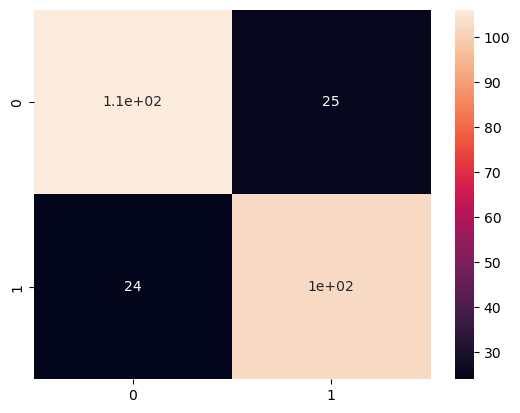

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)